<style>
  .hw-header {
    background: linear-gradient(45deg, #2C3E50, #4CA1AF);
    color: white;
    padding: 20px;
    border-radius: 10px;
    font-family: Arial, sans-serif;
    text-align: center;
    max-width: 800px;
    margin: 20px auto;
    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
  }
  .hw-title {
    font-size: 32px;
    margin-bottom: 10px;
    text-transform: uppercase;
    letter-spacing: 2px;
  }
  .hw-subtitle {
    font-size: 18px;
    font-weight: normal;
    margin-bottom: 15px;
    opacity: 0.8;
  }
  .hw-topics {
    font-size: 14px;
    display: flex;
    justify-content: center;
    flex-wrap: wrap;
    gap: 10px;
    margin-top: 15px;
  }
  .topic-tag {
    background-color: rgba(255,255,255,0.2);
    padding: 5px 10px;
    border-radius: 20px;
  }
</style>

<div class="hw-header">
  <h1 class="hw-title">Homework #6</h1>
  <h2 class="hw-subtitle">Navigating the Challenges of Missing Data</h2>
  <div class="hw-topics">
    <span class="topic-tag">MCAR, MAR, MNAR</span>
    <span class="topic-tag">Imputation Strategies</span>
    <span class="topic-tag">Unbalanced Datasets</span>
    <span class="topic-tag">Ethical Considerations</span>
  </div>
</div>

____

![missing](https://miro.medium.com/v2/resize:fit:1400/1*Lv3stjRTR86LUKli3druUA.png)

## <font color=#18453B> Problem #1 Balance and Missingness (10 pts) </font>

In this problem you will think through a situation in which the dataset has two problems at once: it is both unbalanced and has missing values.

### Scenario:
You are a data scientist at a financial institution developing a credit scoring model to predict loan defaults. You have a dataset of 10,000 loan applications with the following characteristics:

- 9,500 non-default cases (majority class)
- 500 default cases (minority class)
- Features include: age, income, credit history, employment status, and loan amount
- 20% of the income data is missing
- 10% of the credit history data is missing

### Tasks:

1. Missingness Analysis:
   - Propose a method to determine if the missing income and credit history data are MCAR, MAR, or MNAR.
   - How might the missingness mechanism affect the balance of your dataset? Explain your reasoning.
____
 - **To determine the quality of missingness I would take a correlation approach. This approach involves creating a new column, N, with a value of 0 or 1 depending on if income data is missing. Then I would use a binary classification like logistic regression to try and predict N based on credit history. If the accuracy of the logistic regression was better than 0.7 I would probably classify income data as MAR. Another approach could be to make a missingness heatmap but sort the index by credit value. This shoudl help visualize any patterns in the data.** 
 - **Ideally the mechanism of missingness would be MCAR because the missingness is not related to any measurements, and then missing values can cimply be dropped. If the values do happen to be MAR then that association between income and credit history can be used to better impute missing values. MNAR would mean that the missing value is dependent on values we can't measure so that is hard to deal with and means the data is biased. To a more granular level the missingness can be a combination of all three mechanisms. It depends on how the actual missingness heatmaps and correlation analysis results appear.**
 ____
2. Data Preparation:
   - Suggest two different approaches to handle the missing data. Explain the pros and cons of each in the context of this imbalanced dataset.
   - Propose a method to address the class imbalance. How might your choice of method interact with your missing data approach?
____
 - **To handle missing data I would perhaps impute with a mean or try to predict the missing value with a model if the MAR mechanism was clear. Imputing with the mean is nice and easy but if our variables are associated with each other than we are creating data that ignores that association and so its misleading. Predicting the missing data with a model can be advantageous because I can use information from other variables to make more realistic data. Predicting missing data can go wrong if I incorrectly classify the relationship between variables and thus make bad predictions which might carry more weight than a safe mean imputation.** 
 - **The analysis is interested in whether the loan defaulted or not. Defaults only make up 5% of all the samples but there are still 500 measurements. I would analyze the dimensionality of non-default cases and if one or two PCA componenets can explain > 90% of the variation than I would undersample the non-default category to 500 because that data is really not that diverse and complex. This method may have unintended consequences on the data if the missing data creates unknown variation by being MNAR.**
 ____
3. Ethical Considerations:
   - Discuss potential biases that might arise from the combination of missing data and class imbalance in this credit scoring context.
   - Propose a strategy to monitor and mitigate these biases in a deployed model.
____
 - **The objective of this data is probably to help predict whether a loan applicant with default or not default on a loan. One way to build credit history is to get a loan. If the model is used without proper chekcs then it could result in a situation where only people who have recieved loans and thus built credit history will be predicted "non-default" and people who haven't build credit history yet will be predicted "default" so they won't recieve a loan and they won't build credit history. Essentially if decisions are made based solely off a model without the context of actual goals(i.e. deliver loans to as many people as possible that maximizes interest with respect to the risk of default) then it can result in a negative feedback loop. To mitigate these biases in a deployed model it might be a good idea to base decisions based on multiple streams of logic such as from the model and also from a human assessment of the situation.**

### Deliverables:
- Written responses to each task (1 paragraphs per sub-question)
- Python code snippets or pseudocode _where appropriate_

____

![missing](https://miro.medium.com/v2/resize:fit:1400/1*miAWYUJ7sgWaRHCZMdP2OQ.png)

## <font color=#18453B> Problem #2 SMOTE (10 pts) </font>

In this problem you will repair a dataset that has a class imbalance. Your dataset is the [Pima Indians Diabetes](https://data.world/data-society/pima-indians-diabetes-database), a good choice for a project. Be sure to get the CSV file so that your Python code can read the CSV file. Your main tasks are to:
* visualize the data to see the level of class imbalance,
* use a SMOTE library to repair the imbalance,
* visualize the new dataset to examine what SMOTE did to the dataset. 

I mentioned in the lecture that [this library](https://imbalanced-learn.org/stable/) is available for handling imbalanced datasets. Check it out and be sure you can import it. 

Run this code to import the libraries and read the data in. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Let's check for missing values: look at the row labeled "count". 

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As part of your general IDA workflow you will check for imbalance, if your dataset allows for that possibility. In Pandas, you might become familiar with [`value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) or related methods. 

Comment this code to illustrate that you have figured out what it does. For example, what kind of object is "class_counts" here? 

In [5]:
# .value_counts() method returns the number of instances of each class in the "outcome" column, it returns a series with index as the class label
class_counts = data['Outcome'].value_counts()
print(class_counts)
# since we know the count of each class we can calculate the sum and then percentage of each label
percentage = (class_counts[1] / class_counts.sum()) * 100
print(f"\nPercentage of diabetic cases: {percentage:.2f}%")

Outcome
0    500
1    268
Name: count, dtype: int64

Percentage of diabetic cases: 34.90%


Similarly, comment this code. In particular, note how a mask is used to select outcomes for the visualization. For example, break this down and explain what it does: `data[data['Outcome']==0]`.

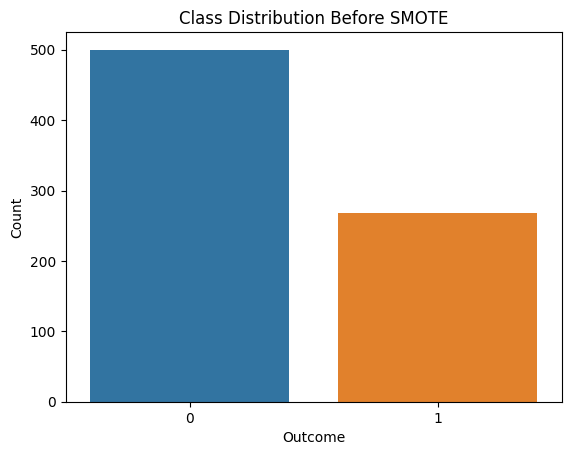

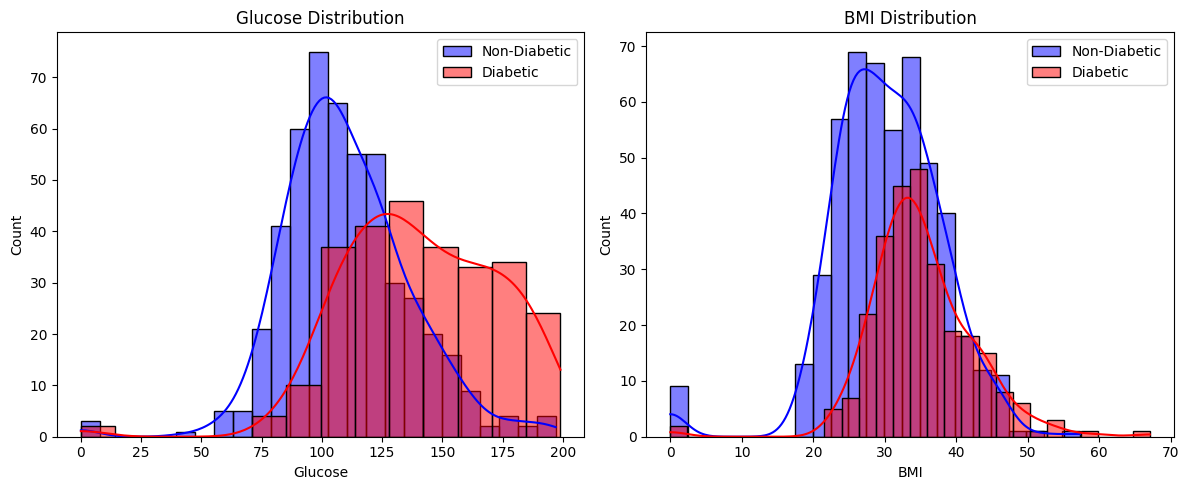

In [6]:
# Bar chart for class distribution
sns.countplot(x='Outcome', data=data)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Histograms for Glucose and BMI
plt.figure(figsize=(12,5))

# create figure with2 subplots and 1 row
plt.subplot(1,2,1)
# select subset of glucose column where outcome column is equal to 0
sns.histplot(data[data['Outcome']==0]['Glucose'], color='blue', label='Non-Diabetic', kde=True)
# select subset of glucose column where outcome column is equal to 1
sns.histplot(data[data['Outcome']==1]['Glucose'], color='red', label='Diabetic', kde=True)
plt.title('Glucose Distribution')
plt.legend()

plt.subplot(1,2,2)
# select subset of bmi where outcome col is equal to 0
sns.histplot(data[data['Outcome']==0]['BMI'], color='blue', label='Non-Diabetic', kde=True)
# select subset of bmi where outcome col is equal to 1
sns.histplot(data[data['Outcome']==1]['BMI'], color='red', label='Diabetic', kde=True)
plt.title('BMI Distribution')
plt.legend()

plt.tight_layout()
plt.show()

By using the online documentation and printing the values of variables, explain in detail what this does:

`smote = SMOTE(random_state=42)`

 - **SMOTE is a method of oversampling the minority class. It works by first selecting an instance, finding a random k-nearest neighbor, and then create new data point that falls somewhere along the line between an observation and it's k-nearest neighbor. This line of code initiates an object to perform SMOTE. The default behavior is to resample all classes except the majority class to be equal but a ratio can be set with "sampling_strategy" parameter. Random state ensures the randomization of algorithm such as knn analysis are repeatable. The number of k-nearest neighbors can be adjusted with "k_neighbors" parameter, the default is 5.**

`X_resampled, y_resampled = smote.fit_resample(X, y)`
- **fit the smote object based on knn analysis on x matrix and classes in y targets**



In [7]:
# separate features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# display original class distribution
print("\nOriginal class distribution:")
print(y.value_counts())

# apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# display new class distribution
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Original class distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Class distribution after SMOTE:
Outcome
1    500
0    500
Name: count, dtype: int64


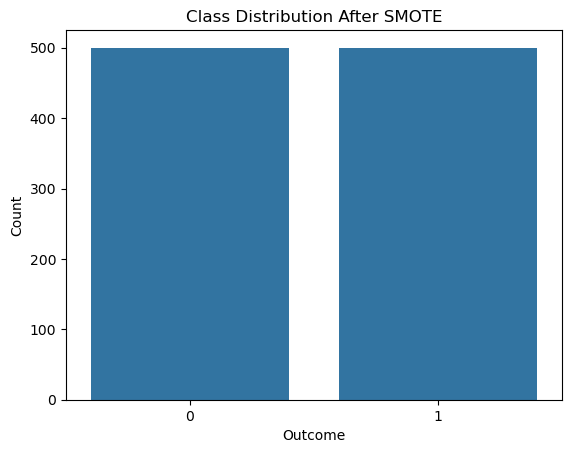

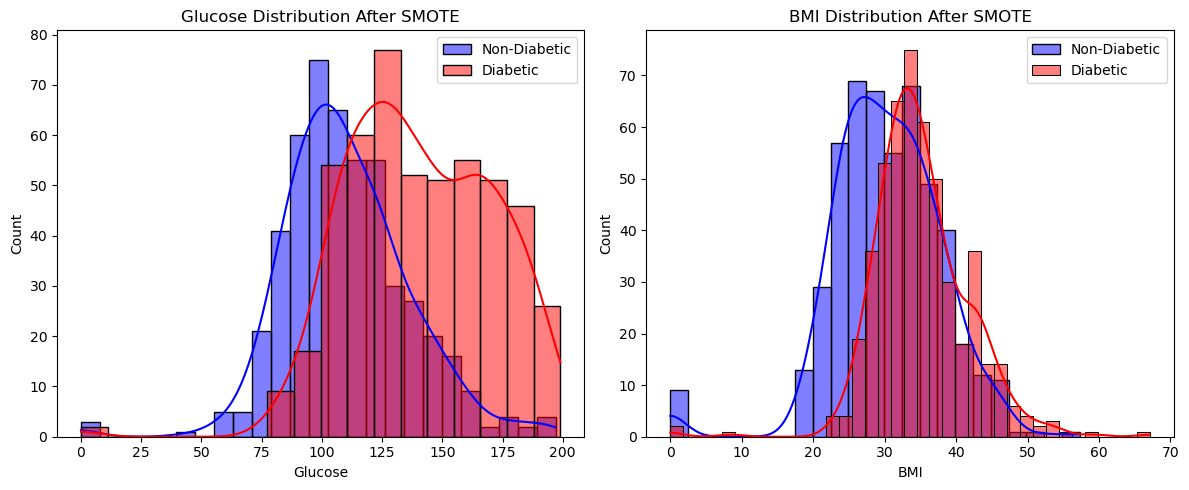

In [37]:
# Bar chart for class distribution after SMOTE
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Optional: Histograms for Glucose and BMI after SMOTE
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Outcome'] = y_resampled

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(resampled_data[resampled_data['Outcome']==0]['Glucose'], color='blue', label='Non-Diabetic', kde=True)
sns.histplot(resampled_data[resampled_data['Outcome']==1]['Glucose'], color='red', label='Diabetic', kde=True)
plt.title('Glucose Distribution After SMOTE')
plt.legend()

plt.subplot(1,2,2)
sns.histplot(resampled_data[resampled_data['Outcome']==0]['BMI'], color='blue', label='Non-Diabetic', kde=True)
sns.histplot(resampled_data[resampled_data['Outcome']==1]['BMI'], color='red', label='Diabetic', kde=True)
plt.title('BMI Distribution After SMOTE')
plt.legend()

plt.tight_layout()
plt.show()

Give a summary, in a markdown cell, of these visualizations and what SMOTE has done to the dataset. 

 - **SMOTE has created more instances of data where the class label is "diabetic". Before SMOTE there were approx 2 times more samples with non-diabetic than diabetic but now there are equal amounts. We can compare the historgrams from before/after smote to see that the relative relationship between diabetic label and important covaraibles, glucose and bmi, remains similar. If oversampling was done with simple imputation it is likely that the two colors on the histograms would start to overlap more.**

____

![regression](https://miro.medium.com/v2/resize:fit:2000/1*N1-K-A43_98pYZ27fnupDA.jpeg)

## <font color=#18453B> Problem #3 Regression (10 pts) </font>

Read Chapter 5 of the textbook. Soon we will get to the mathematics of regression, so this is an important chapter. 

Summarize the chapter's main points in a markdown cell. 

- **Summary - Chapter 5 is titled "Regression for Describing and Forecasting". The main points of this chapter are that regression is a powerful tool to describe the relationship between 2 or more variables and also be used to predict values based on another but to be aware of over-fitting. First the chapter goes through the basics of how what regression is and how it is performed with definitions about ordinary least squares, line of best fit, errors, and sum-of-square errors. It illustrates how the slope of a regression captures the magnitude of the relationship and how r-squared and toor-mean squared error can be used to describe how accurate regression predictions are.**

____

![missing](https://www.crosstab.io/articles/streamlit-review/worst_case_app.png)

## <font color=#18453B> Problem #4 Update on Your Project (10 pts) </font>

By now you should have decided on the main topic of your project and the data that is going to be used to inform it. (If not, do that now!)

For this HW, answer these questions:
1. clearly articulate the goal of your project (this goal might not be reached until the second half of the semester, of which half will be done by the midterm)
 - **The goal of my project is to describe the relationship between  corn yield, canopy-level remote sensing phenotypes, and leaf-level gas exchange phenotypes in two different Nitrogen fertilizer treatments levels. Understanding the relationship better may help to breed and enable more effecient agriculture practices with respect to fertilizer usage. One particular angle I would like to take is to determine if canopy level remote sensing can be predictive of leaf level physiology**
2. what are the datasets you plan to use?
 - **The datasets come from 3 distinct sources but all collected on the same population of corn plants growing in 2022 and 2023 at the MSU farm complex south of campus. One source is plot level agronomic traits such as grain yield, flowering time, and height, collected by myself and others in the Thompson Lab. The other source are leaf level gas exchange measurements (e.g. how much CO2 and H2O is the leaf "breathing") collected on two plants per plot. The third dataset is plot level remote sensing measurements time-series each collected many times per growing season. All three of these data sets can be aggregated to the plot level**
3. describe the data: will you need to use, for example, encoding of any kind? 
 - **The data are collected on many different scales so normalization will probably be required. For instance remote sensing comes in reflectance values and unit-less normalized indices while yield comes in grams of grain per plant. Another thing to consider is that for most plots I have two leaf-level measurements so they will probably need to be aggregated to the plot level.**
4. what is your IDA strategy? 
 - **Aggregate leaf level data to plot level, I can just take mean or fit a model to estimate the true plot value. Merge together remote sensing, agronomic, and aggregated gas-exchange data together based on meta data keys. Plot and Year are the keys. Drop some columns that are relavents for other projects in the lab but not this particular one. There are some missing data in the datasets so I will need to decide if imputation or dropping is the better path.** 
5. list the detailed steps of your EDA strategy
 - **First, create joint plots of my quantitative variables of interest (yield, canopy level ndvi, gas exchange measurements) and color the plots by the NTreatment factor. I will also make a correlation heatmap that is separated by NTreatment factor.**
6. are there imbalances in your dataset? how will you handle this? 
 - **There are no imbalances with respect to factor levels like year or NTreatment as by experimental design.**
7. give a detailed account of your visualization plan, including why you made the choices you did 
 - **My goal is to understand how Nitrogen fertilizer level affects the relationship between quantitative factors that I know from domain knowledge are associated together most of the time. For this reason I will split my plots by NTreatment level often. In each NTreatment level I will use correlation heatmaps and jointplots to assess how those relationships change.**
8. all of this will end up in a Streamlit app: desribe your planned layout and logic behind it
 - **I imagine the Streamlit app will have at least two different pages. One page will be a multi-panel figure with a correlation heatmap of selected variables in the high and low Nitrogen fertilizer treatments. Then some select jointplots of interesting associations. The next page will focus on the association between leaf-level measurements and remote sensing measurements and comparing a few different attempts to model leaf-level using remote sensing data. The visualization here will be like a bar graph of prediction accuracies based on different methods. The different methods will be various prediction approaches to be decided.**




____


![missing](https://miro.medium.com/v2/resize:fit:1400/1*ENvt_PTaH5v4BXZfd-3pMA.png)

## <font color=#18453B> Problem #5 More Practice with EDA (10 pts) </font>


In this HW problem you are going to explore how to use Seaborn to perform some basic EDA. Once you understand the logic of how Seaborn works, you can quickly make a wide range of visualizations very quickly to find interesting features in your data. Although the details will be different, understand the logic of Seaborn's API will suggest features to look for in other visualization libraries that are organized differently.

You will build within three contexts: `displot`, `kdeplot` and `jointplot`. A basic, default plot is given using the iris dataset. The workflow that Seaborn allows is that you begin your EDA within one of a simple plot and very quickly and easily perform a wide range of explorations from that starting point. 

Let's get started with `displot`. This choice is used for univariate dsitributions. Here is the basic code for iris in `displot`. Make sure you understand this code, and try some variations from other parts of the dataset.

<Figure size 800x500 with 0 Axes>

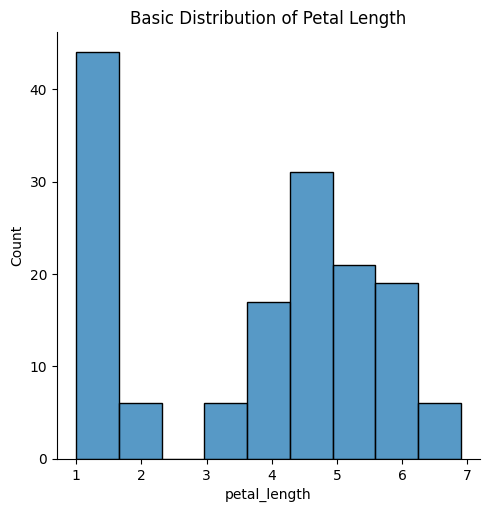

<Figure size 800x500 with 0 Axes>

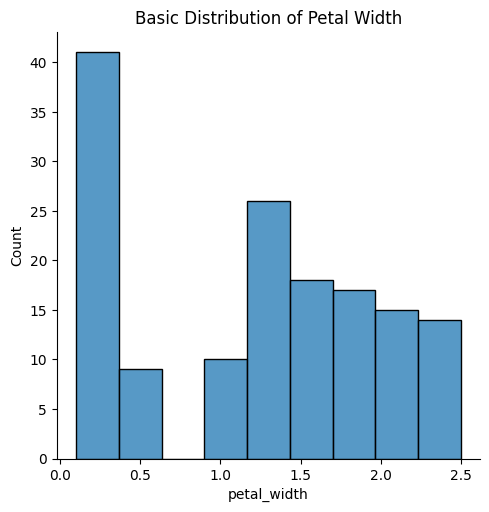

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

plt.figure(figsize=(8, 5))
sns.displot(data=iris, x="petal_length")
plt.title("Basic Distribution of Petal Length")
plt.show()


plt.figure(figsize=(8, 5))
sns.displot(data=iris, x="petal_width")
plt.title("Basic Distribution of Petal Width")
plt.show()

Next, by only modifying the `displot` we already in place, make these changes and comment on your observations:
* explore and vary the `kind=` option, including `kind=kde` and vary `fill=`
 - **Setting kind unlocks other keyword arguements such as the bw_adjust can only be used if specifying kind = 'kde'**
* you can vary the number of bins: vary `bins=`
 - **Bin width can help with graph look nicer based on spread**
* use `palette=` to vary the color scheme
* you can have a histogram _and_ a KDE: use bins= and `kde=True`
 - **setting kde = True puts a kde on histogram but does not unlock same parameters as setting kind = kde**
* the width of the kernel is called the bandwidth: vary widely `bw_adjust= `
 - **Help adjuste smoothness of kde fit**
* since this dataset has categories and Seaborn understands this, vary `hue=` with categorical column in the data
* we might want to break this apart: explore `col=`; is there a `row=`? 
 - **hue row and col are all helpful to visualize distrubution with respect to class labels**
* what does `multiple=` do? 
 - **multiple parameter controls how multiple classes are visualized. Either stack, layer, dodge, or stack**
* add `rug=True`
* now, on your own, create various mixtures of these choices! [Read this](https://seaborn.pydata.org/generated/seaborn.displot.html) to see if there is anything I missed!

Hopefully you see the power of Seaborn: once you have a basic plot set up, it is easy to explore it in various ways with minimal changes to your code. 

Let's see if we can do the same with `kdeplot`....

<Figure size 800x500 with 0 Axes>

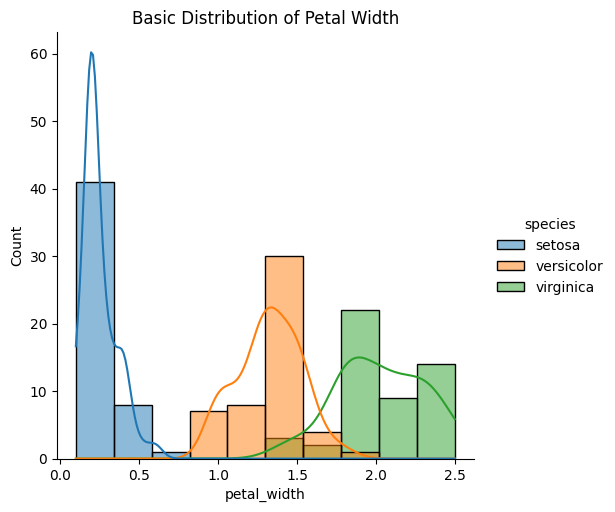

<Figure size 800x500 with 0 Axes>

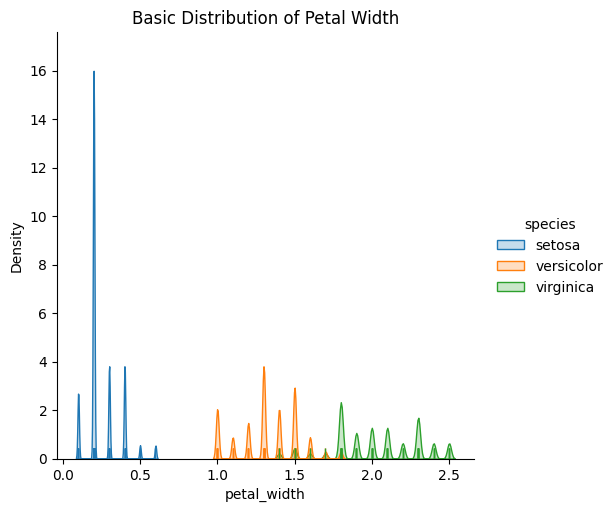

In [26]:
# kde, bins, fill and hue
plt.figure(figsize=(8, 5))
sns.displot(data=iris, x="petal_width", bins = 10, kde=True, fill = 'species', hue='species')
plt.title("Basic Distribution of Petal Width")
plt.show()

# with rugplot and very narrow bands - bad plot
plt.figure(figsize=(8, 5))
sns.displot(data=iris, x="petal_width", kind ='kde', fill = 'species', hue='species', bw_adjust=0.1, rug=True)
plt.title("Basic Distribution of Petal Width")
plt.show()

Now that you’ve explored displot for univariate distributions, let’s move on to kdeplot. This function is useful for both 1D and 2D kernel density estimation (KDE), giving you more control over visualizing distributions.


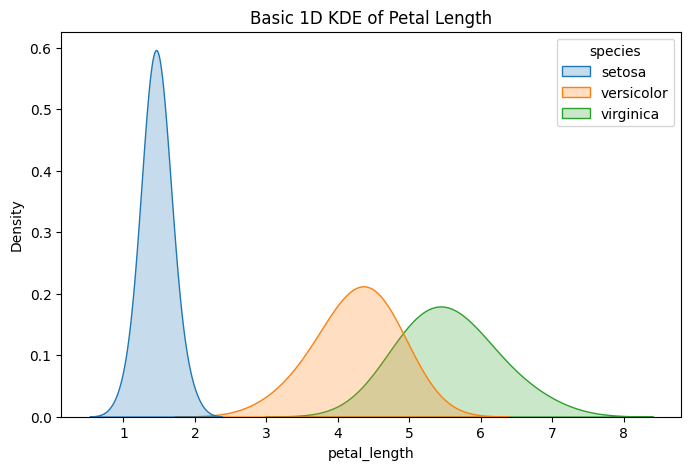

In [29]:
plt.figure(figsize=(8, 5))
# increase bw adjust to make smoother
sns.kdeplot(data=iris, x="petal_length", fill=True, hue = 'species', bw_adjust = 2)
plt.title("Basic 1D KDE of Petal Length")
plt.show()

Vary:
* hue
* bw_adjust

What differences do you see between `displot` and `kdeplot` so far? 
 - **kdeplot does not include row and col parameters because it returns a matplotlib axes level object with the plot, but displot returns a facet level that allows subplots**

One of the advantages of `kdeplot` is that it can very easily switch to 2D. Notice how much coding was needed to make such a change. 

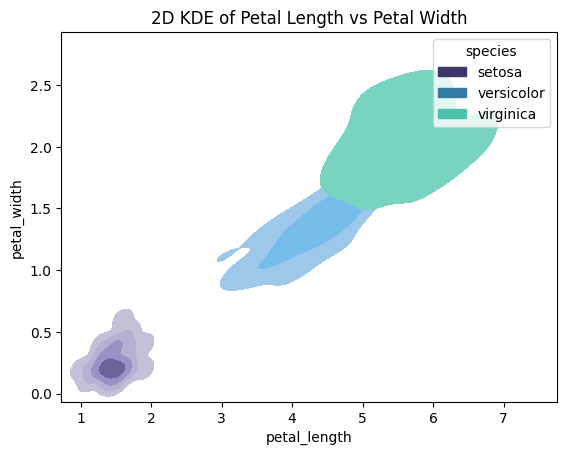

In [57]:
sns.kdeplot(data=iris, x="petal_length", y="petal_width", fill=True, hue = 'species', palette='mako', levels = 5)
plt.title("2D KDE of Petal Length vs Petal Width")
plt.show()

In your own words, explain what this 2D KDE plot reveals to you. That is, how do you interpret this visualization and how would you explain to someone else? 
 - **2D KDE plots reveal the probability of an observation based on the value of another variable. So for instance, given the plot of above we can see that if a sample is from setosa species it is likely to have a petal length between 1 and 2 and width between 0.1 and 0.5 with a hotspot in the midlle.**

Next, make these changes:

* contour plots: Add contour lines by setting `fill=False` and `levels=5`. How does the representation change?
* color variations: Explore how different color palettes affect the KDE using the palette option.
* explore interactions with hue in 2D: Add `hue="species`" to the 2D KDE and observe the different species in the joint distribution.

Once you’ve completed these steps, experiment with different combinations to explore the KDE capabilities fully. Make a _very creative_ new variant. [Read this](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to see if there are great ideas I might have missed! 

Finally, let’s turn to jointplot:

jointplot combines both joint and marginal distributions into a single figure, making it very useful for analyzing relationships between two variables while also seeing their individual distributions.

Here’s a basic jointplot of petal_length vs petal_width with a 2D KDE:

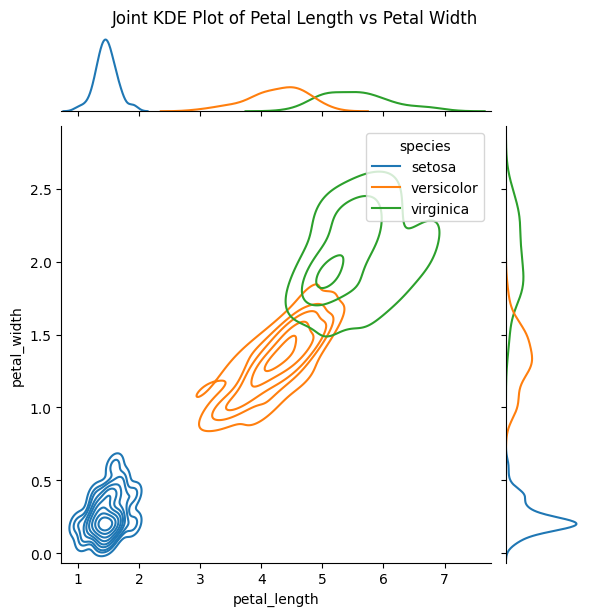

In [64]:
sns.jointplot(data=iris, x="petal_length", y="petal_width", kind="kde", hue = 'species')
plt.suptitle("Joint KDE Plot of Petal Length vs Petal Width", y=1.02)
plt.show()

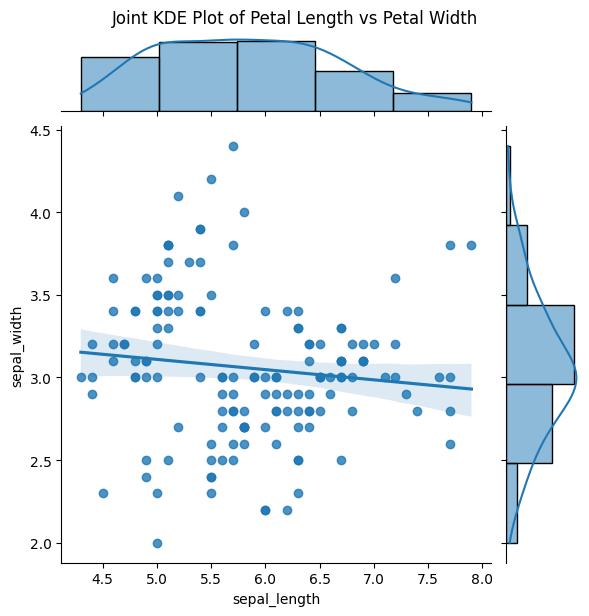

In [71]:
sns.jointplot(data=iris, x="sepal_length", y="sepal_width", kind="reg", marginal_kws={'bins':5})
plt.suptitle("Joint KDE Plot of Petal Length vs Petal Width", y=1.02)
plt.show()

Describe what this plot is telling you. What new information does this reveal that `displot` and `kdeplot` didn't? 
 - **A main advantage of joint plot is that it also visualizes 1d distributions which can be a little tricky with the 2D plots in my opinion**

* Basic Jointplot: Start with the provided code and ensure you understand how it combines the joint KDE with marginal distributions.
* Change the Plot Type: Try different kind options, such as `scatter` and `reg`. What insights do you gain from these?
* Using hue: Add `hue="species` to the jointplot. How does it change the analysis?
 - **Adding hue breaks up with chart elements with respect to class labels in species column.**
* Marginal Options: Customize the marginals using marginal_kws to switch between histograms and KDEs.
* Exploring Other Variables: Try using other features like `sepal_length` and `sepal_width`. What do you observe in the relationships?
 - **The relationship between sepal length and sepal width is not as strong as the relationship between petal length and petal width.**

Once you’ve completed the modifications, experiment with different combinations of these options to fully explore what jointplot can offer for EDA. [Read this](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to see if there is anything I missed!